     1  1.1  1.2  1.3
0    1    1    1    2
1    1    1    1    3
2    1    1    1    4
3    1    1    1    5
4    1    1    2    1
..  ..  ...  ...  ...
619  5    5    5    1
620  5    5    5    2
621  5    5    5    3
622  5    5    5    4
623  5    5    5    5

[624 rows x 4 columns]
    Pos
0     1
1     1
2     1
3     1
4     1
..   ..
619   1
620   1
621   1
622   1
623  -1

[624 rows x 1 columns]

 Vanilla Perceptron
Incorrect values assigned 95
Incorrect values assigned 97
Incorrect values assigned 97
Incorrect values assigned 97
Incorrect values assigned 96
Incorrect values assigned 96
Incorrect values assigned 96
Incorrect values assigned 97
Incorrect values assigned 96
Incorrect values assigned 97
The W matrix is:
 1     -2.0
1.1    2.0
1.2    4.0
1.3   -6.0
Name: 25, dtype: float64
B value is: 4

 Voted Perceptron
Incorrect values assigned 95
Incorrect values assigned 95
Incorrect values assigned 93
Incorrect values assigned 95
Incorrect values assigned 96
Incorrect values

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

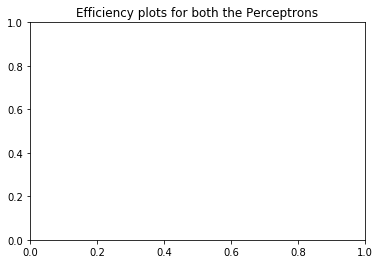

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("balance-scale.data")
df = pd.DataFrame(data)
cols =[1,2,3,4]
df.drop(df.columns[cols],axis=1,inplace = True)
df.columns =['Pos']


data = pd.read_csv("balance-scale.data")
X = pd.DataFrame(data)
X.drop(X.columns[0],axis=1,inplace = True)
print(X)
#labels
lbl = 4
w = np.ones(lbl)
b = 0
R = []
 
for index in df.index:
    if df.loc[index,'Pos']=='L':
        df.loc[index,'Pos']= 1
    elif df.loc[index,'Pos']=='R':
        df.loc[index,'Pos']= 1
    else:
        df.loc[index,'Pos'] = -1
print(df)


print('\n Vanilla Perceptron')

effi1=[] 
for j in range(10):
    inc=0
    effi = 0
    for i in range(624):
        a = np.dot(w,X.iloc[i])+b
        R.append(np.sign(a))
        
#       print(df.iloc[i]['Gen']*a)
        if df.iloc[i]['Pos']*a <=0:
            inc+=1
            w += np.multiply(X.iloc[i],df.iloc[i]['Pos'])
            b += df.iloc[i]['Pos']
    
    for l in range(624):
        if np.sign(np.dot(w,X.iloc[l])+b)==df.iloc[l]['Pos']:
            effi+=1
    effi1.append(effi)
    
    print("Incorrect values assigned",inc)
print('The W matrix is:\n',w)  
print('B value is:',b)


#2. Implementing voted perceptron

print('\n Voted Perceptron')
w = np.ones(lbl)
b = 0
R = []
c=1
effi2=[]
for j in range(10):
    inc = 0
    b_voted = 0
    voted = 0
    effi = 0
    for i in range(624):
        a = np.dot(w,X.iloc[i])+b
        c+=1
#       print(df.iloc[i]['Gen']*a)
        if df.iloc[i]['Pos']*a <=0:
            voted += np.multiply(w,c)
            b_voted += np.multiply(b,c)
            #print(c)
            c=1
            inc+=1
            w += np.multiply(X.iloc[i],df.iloc[i]['Pos'])
            b += df.iloc[i]['Pos']
    for l in range(624):
        if np.sign(np.dot(w,X.iloc[l])+b)==df.iloc[l]['Pos']:
            effi+=1
    effi2.append(effi)     
    
    w = voted/624
    b = b_voted/624
    print("Incorrect values assigned",inc)
print('The voted W matrix is:\n',w)
print('The voted b is:',b)


print(effi1)
print(effi2)
effi1 = [ x/6.24 for x in effi1]
effi2 = [ x/6.24 for x in effi2]
#Plotting
Xaxis =[1,2,3,4,5]
plt.title("Efficiency plots for both the Perceptrons")
plt.plot(Xaxis, effi1, label = 'vanilla perceptron')
plt.plot(Xaxis, effi2, label = 'voted perceptron')
plt.legend()
plt.show()